# Week 3: Influence Measures and Network Centralization

# Degree and Closeness Centrality

How do we identify important nodes in a network? Look back at the karate example. 

This could be the nodes with:   
* the most edges  
* the highest average proximity to other nodes  
* the fraction of shortest paths that pass through the node  

In [5]:
import networkx as nx
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label=1)

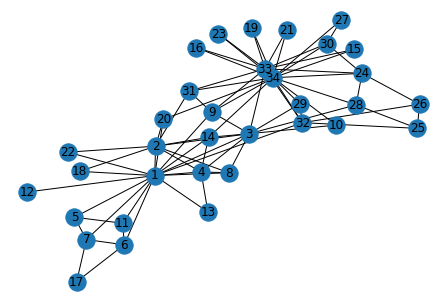

In [6]:
nx.draw(G, with_labels=True)

Let's formalize this. This general topic is called *network centrality*. It identifies the most important nodes in a network. For example:

* Influential nodes in a social network  
* Nodes that disseminate information to many nodes or prevent epidemics  
* Hubs in a transportation network  
* Important pages on the web  
* Nodes that prevent the network from breaking up  


Centrality measures that are commonly used:

* Degree centrality  
* Closeness centrality  
* Betweenness  
* Load   
* Page Rank    
* Katz Centrality  
* Percolation centrality  

## Degree Centrality
Important nodes have many connections. This is the most basic measure of centrality: the number of neighbors. For undirected networks, use degree. For directed networks, use in-degree or out-degree. 

$C_{deg}(v) = \frac{d_v}{|N|-1}$

Where $N$ is the set of nodes in the network, and $d_v$ is the degree of node $v$.

Values of centrality go from 0 to 1. A node would have a centrality of 1 if it is connected to every other node, and a centrality of 0 if it is not connected to anything. 

Let's generate a dictionary of centralities of every node in our karate network. 

In [7]:
degCent = nx.degree_centrality(G)

In [8]:
degCent

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 20: 0.09090909090909091,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 24: 0.15151515151515152,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 27: 0.06060606060606061,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 34: 0.5151515151515151}

In [9]:
degCent[34]

0.5151515151515151

For directed networks, we should use the in-degree or out-degree centrality. 

**In-degree centrality**:

$C_{indeg}(v) = \frac{d_v^{in}}{|N|-1}$

* $N$ is the set of nodes in the network  
* $d_v^{in}$ is the in-degree of node $v$- the number of directed edges pointing toward that node. 

        indegCent = nx.in_degree_centrality(G)  
        indegCent['A']
        
**Out-degree centrality**

$C_{outdeg}(v) = \frac{d_v^{out}}{|N|-1}$

* $N$ is the set of nodes in the network  
* $d_v^{out}$ is the out-degree of node $v$- the number of directed edges pointing away from that node. 

        outdegCent = nx.out_degree_centrality(G)  
        outdegCent['A']

## Closeness Centrality
Nodes that are important will be a short distance away from all other nodes. 

$C_{close}(v)= \frac{|N|-1}{\Sigma d(v,u)}$

The sum in the denomenator is the sum over all other nodes in the network's distance to node $v$. 

In [11]:
closeCent = nx.closeness_centrality(G)  
closeCent[32]

0.5409836065573771

Can we look more closely at how this number is generated?

In [13]:
nx.shortest_path_length(G,32)

{32: 0,
 1: 1,
 33: 1,
 34: 1,
 25: 1,
 26: 1,
 29: 1,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 27: 2,
 28: 2,
 30: 2,
 31: 2,
 17: 3}

In [14]:
sum(nx.shortest_path_length(G,32).values())

61

^ This is the total amount of distance to all other nodes, which is the denomenator of our equation. Now how about the numerator. 

In [16]:
len(G.nodes())-1

33

In [17]:
(len(G.nodes())-1) / sum(nx.shortest_path_length(G,32).values())

0.5409836065573771

We are making the assumption that all nodes can reach each other, but that's not always the case. How do we measure closeness centrality when a node can't reach all other nodes? 

*Option 1*: Only consider the nodes that L can reach. 

$C_{close}(L) = \frac{|R(L)|}{\Sigma d(L,U)}$

Only sum over $R(L)$, the set of nodes that $L$ can reach. This makes for high centralities even for nodes that are only connected to one other node. 

    closeCent = nx.closeness_centrality(G, normalized = False)

*Option 2*: Normalize by the fraction of nodes that $L$ can reach. 

$C_{close}(L) = \frac{|R(L)|}{|N-1|}\frac{|R(L)|}{\Sigma d(L,U)}$

Now, if $L$ can't reach many nodes, the centralities are much smaller. This is more reasonable if you care about the centrality across the whole network. 

    closeCent = nx.closeness_centrality(G, normalized = True)

# Betweenness Centrality

Based on the idea that important nodes connect other nodes. What are the nodes that show up in the shortest paths between two other nodes?

$C_{btw}(v) = \Sigma \frac{\sigma_{s,t}(v)}{\sigma_{s,t}}$

* $\sigma_{s,t}$ is the number of shortest paths between $s$ and $t$  
* $\sigma_{s,t}(v)$ is the number of shortest paths between $s$ and $t$ that contain node $v$  
* Take the sum over all possible $s$ and $t$s. 

D------  
A: 3  
B: 3  
C: 3  
E-G: 0  

Option: Are we going to include node $v$ in the sets $s$ and $t$ or not? If we include $v$ then there are many more options to look at. `networkx` takes this option as an input parameter.

What if some pairs of nodes are not connected to each other? This tends to happen more often in directed graphs. If no node can reach $D$, for example, $\sigma_{A,D} = 0$ because there are no shortest paths from $A$ to $D$. Since this is in the denomenator, this is undefined. In this case, only consider sets that include $D$ in the shortest path. 

*Normalization*: The problem is that larger graphs will tends to have higher centralities than smaller graphs because there are more nodes to choose from. To normalize, divide centrality by the number of possible pairs in the network, not including v. 

* For undirected graphs, divide by $\frac{1}{2}(|N|-1)(|N|-2)$
* For directed graphs, divide by $(|N|-1)(|N|-2)$

In [24]:
btwnCent = nx.betweenness_centrality(G, normalized = True, endpoints=False)
# Look at the five largest
import operator
sorted(btwnCent.items(), 
       key = operator.itemgetter(1),
       reverse = True)[0:5]

[(1, 0.43763528138528146),
 (34, 0.30407497594997596),
 (33, 0.145247113997114),
 (3, 0.14365680615680618),
 (32, 0.13827561327561325)]

One of the issues with betweenness centrality is that it is complex and can be computationally expensive. It can take up $O(|N|)^3$, or scale with size of network cubed. 

Rather than calculating the betweenness on all nodes, you can approximate it by looking at a sample of notes. Include parameter $k$ to `nx`.

In [27]:
btwnCent_approx = nx.betweenness_centrality(G, 
                                     normalized = True, 
                                     endpoints=False,
                                     k=10)
sorted(btwnCent_approx.items(), 
       key = operator.itemgetter(1),
       reverse = True)[0:5]

[(34, 0.41914321789321785),
 (1, 0.3947297378547378),
 (3, 0.21090037277537277),
 (33, 0.10576960076960078),
 (32, 0.09951674482924483)]

We get a very similar list but with different values.

You may also like to calculate the centrality between two *subsets* in the network. Your priority is that the two subsets can communicate with each other. 

In [28]:
btwnCent_subset = nx.betweenness_centrality_subset(
                      G, 
                      [34, 33, 21, 30, 16, 27, 15, 23, 10],
                      [1, 4, 13, 11, 6, 12, 17, 7],
                      normalized = True)

In [30]:
sorted(btwnCent_subset.items(),
       key = operator.itemgetter(1),
       reverse = True)[0:5]

[(1, 0.04899515993265994),
 (34, 0.028807419432419434),
 (3, 0.018368205868205867),
 (33, 0.01664712602212602),
 (9, 0.014519450456950456)]

These also mostly happen to be the same nodes without looking at subsets, although now we are seeing node 9 which we didn't see before.

You can also find the **betweenness centrality of an edge** instead of a node. 

$C_{btw}(e) = \Sigma \frac{\sigma_{s,t}(e)}{\sigma_{s,t}}$

* $\sigma_{s,t}$ is the number of shortest paths between $s$ and $t$ 
* $\sigma_{s,t}(e)$ is the number of shortest paths between $s$ and $t$ that contain edge $e$  
* Take the sum over all possible $s$ and $t$s. 

In [32]:
btwnCent_edge = nx.edge_betweenness_centrality(G, normalized = True)
sorted(btwnCent_edge.items(),
       key = operator.itemgetter(1),
       reverse = True)[0:5]

[((1, 32), 0.1272599949070537),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.0777876807288572),
 ((1, 9), 0.07423959482783014)]

This works for subsets as well. 

In [34]:
btwnCent_edge_subset = nx.edge_betweenness_centrality_subset(
                      G, 
                      [34, 33, 21, 30, 16, 27, 15, 23, 10],
                      [1, 4, 13, 11, 6, 12, 17, 7],
                      normalized = True)

In [35]:
sorted(btwnCent_edge_subset.items(),
       key = operator.itemgetter(1),
       reverse = True)[0:5]

[((1, 9), 0.01366536513595337),
 ((1, 32), 0.01366536513595337),
 ((14, 34), 0.012207509266332794),
 ((1, 3), 0.01211343123107829),
 ((1, 6), 0.012032085561497326)]

These are mostly edges that go from the center to the outer nodes.

# Basic Page Rank

Developed by the Google founders when they were thinking about how to measure the importance of websites from the hyperlink network structure.

PageRank assigns a score of importance to each node. Important nodes are those with many in-links from important pages. PageRank can be used for any type of network, but it is mainly used for directed networks. 

A node's PageRank depends on the PageRank of other nodes- a bit circular.

$n$- number of nodes in the network  
$k$- number of steps  

1. Assign all nodes a PageRank of $1/n$  
2. Perform the basic PageRank update rule $k$ times: each node will give an equal share of its current PageRank to all the nodes it links to.  
3. The new PageRank will be the sum of contributions from all the pages that point to it.  

Whichever nodes is the most important may change with more steps. How do you decide how many steps? Eventually the values will change very little and converge. The converged values are the values you accept as the PageRank. 

**Scaled Page Rank**

Interpreting PageRank- the probability that a random walker ends up at a given node after taking $k$ steps. 

Why is this useful? You're finding which pages the random walker gets "stuck" on. Can be a problem if some nodes only point to each other in a little circular loop. 

Introduce a new damping parameter $a$. Then,  
* With probability $a$, choose an outgoing edge at random and follow it to the next node.  
* With probability $1-a$, choose a node at random and go to it.  
* Repeat $k$ times  

The random walk is no longer stuck on those nodes. Now your outcome depends on your $a$ value, which is usually 0.8-0.9. 

    pagerank(G, alpha=0.8)

# Hubs and authorities

How should you arrange a website map?

Given a query to a search engine:  
* **Root**: the set of highly relevant web pages (pages that contain the query string) - potential *authorities*  
* Find all pages that link to a page in root - potential *hubs*  
* **Base**: root nodes and any node that links to a node in root  
* Consider all edges connecting nodes in the network  

Run the HITS algorithm to assign an *authority score* and *hub score* to each node. 

1. Assign each node an authority and hub score of 1  
2. Apply the *Authority Update Rule*: each node's authority score is the sum of hub scores of each node that points to it.  
3. Apply the *Hub Update Rule*: each node's hub score is the sum of authority scores of each node that it points to.  
4. *Normalize* authority and hub scores: $auth(j) = \frac{auth(j)}{\Sigma auth(i)}$

For some nodes, the authority and hub scores converge, but for others, they continue to change at higher iterations. 

# Quiz

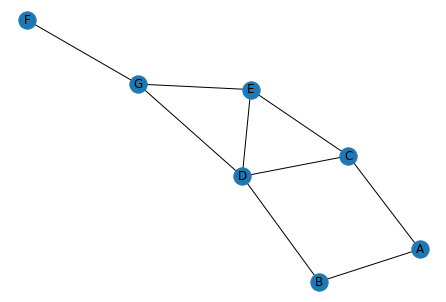

In [38]:
Gq = nx.Graph()
Gq.add_edge('A','B')
Gq.add_edge('A','C')
Gq.add_edge('B','D')
Gq.add_edge('C','D')
Gq.add_edge('C','E')
Gq.add_edge('D','E')
Gq.add_edge('D','G')
Gq.add_edge('E','G')
Gq.add_edge('G','F')
nx.draw(Gq, with_labels=True)

In [41]:
nx.edge_betweenness_centrality(Gq, normalized=False)

{('A', 'B'): 2.666666666666666,
 ('A', 'C'): 4.333333333333333,
 ('B', 'D'): 5.666666666666667,
 ('C', 'D'): 3.666666666666666,
 ('C', 'E'): 3.666666666666666,
 ('D', 'E'): 2.0,
 ('D', 'G'): 6.333333333333333,
 ('E', 'G'): 3.6666666666666665,
 ('G', 'F'): 6.0}

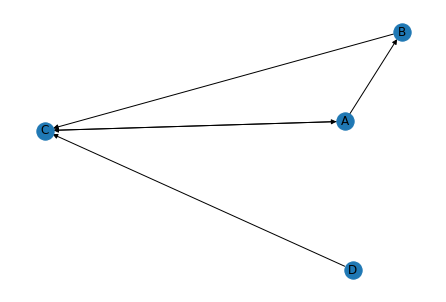

In [43]:
G8 = nx.DiGraph()
G8.add_edge('A','B')
G8.add_edge('A','C')
G8.add_edge('C','A')
G8.add_edge('B','C')
G8.add_edge('D','C')
nx.draw(G8, with_labels=True)